<a href="https://colab.research.google.com/github/ibzan79/BEDU/blob/main/fase_3_mod_1_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

from scipy import stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/enfermedades_cardiovasculares.csv', index_col = 0)

df.head()

,edad,genero,estatura,peso,imc,presion_sistolica,presion_diastolica,colesterol,glucosa,tabaco,alcohol,act_fisica,enfermedad_cardiovascular
0,50,2,168,62.0,21.97,110,80,1,1,0,0,1,0
1,55,1,156,85.0,34.93,140,90,3,1,0,0,1,1
2,51,1,165,64.0,23.51,130,70,3,1,0,0,0,1
3,48,2,169,82.0,28.71,150,100,1,1,0,0,1,1
4,47,1,156,56.0,23.01,100,60,1,1,0,0,0,0


### Estimados de locación y variabilidad

In [19]:
estimados_loc = df.describe().T

In [14]:
medianas = []
medias_truncadas = []

for columna in df:
    medianas.append(df[columna].median())
    medias_truncadas.append(stats.trim_mean(df[columna], 0.1))

In [16]:
medias_truncadas

[133.26145710928319,
 0.0025287896592244424,
 0.0013595769682726206,
 0.00428084606345476,
 0.0012538190364277323,
 0.0,
 0.0,
 46.87955346650999,
 1.2193301997649821,
 5.1650998824911865,
 7.707873090481787,
 68.63454759106934,
 92.97238542890717,
 163.1075205640423,
 3.7591069330199764,
 0.17038777908343125,
 138.48589894242068,
 135.50881316098707,
 138.71974148061105,
 12.378965922444184,
 0.372502937720329,
 1.1521739130434783]

In [20]:
estimados_loc

,count,mean,std,min,25%,50%,75%,max
fhr,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
aceleraciones,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
movimiento_fetal,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
contracciones_uterinas,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
desaceleraciones_lig,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
desaceleraciones_sev,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
desaceleraciones_prolongadas,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
vcp_anormal,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_vcp,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
porcentaje_de_tiempo_con_vlp_anormal,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


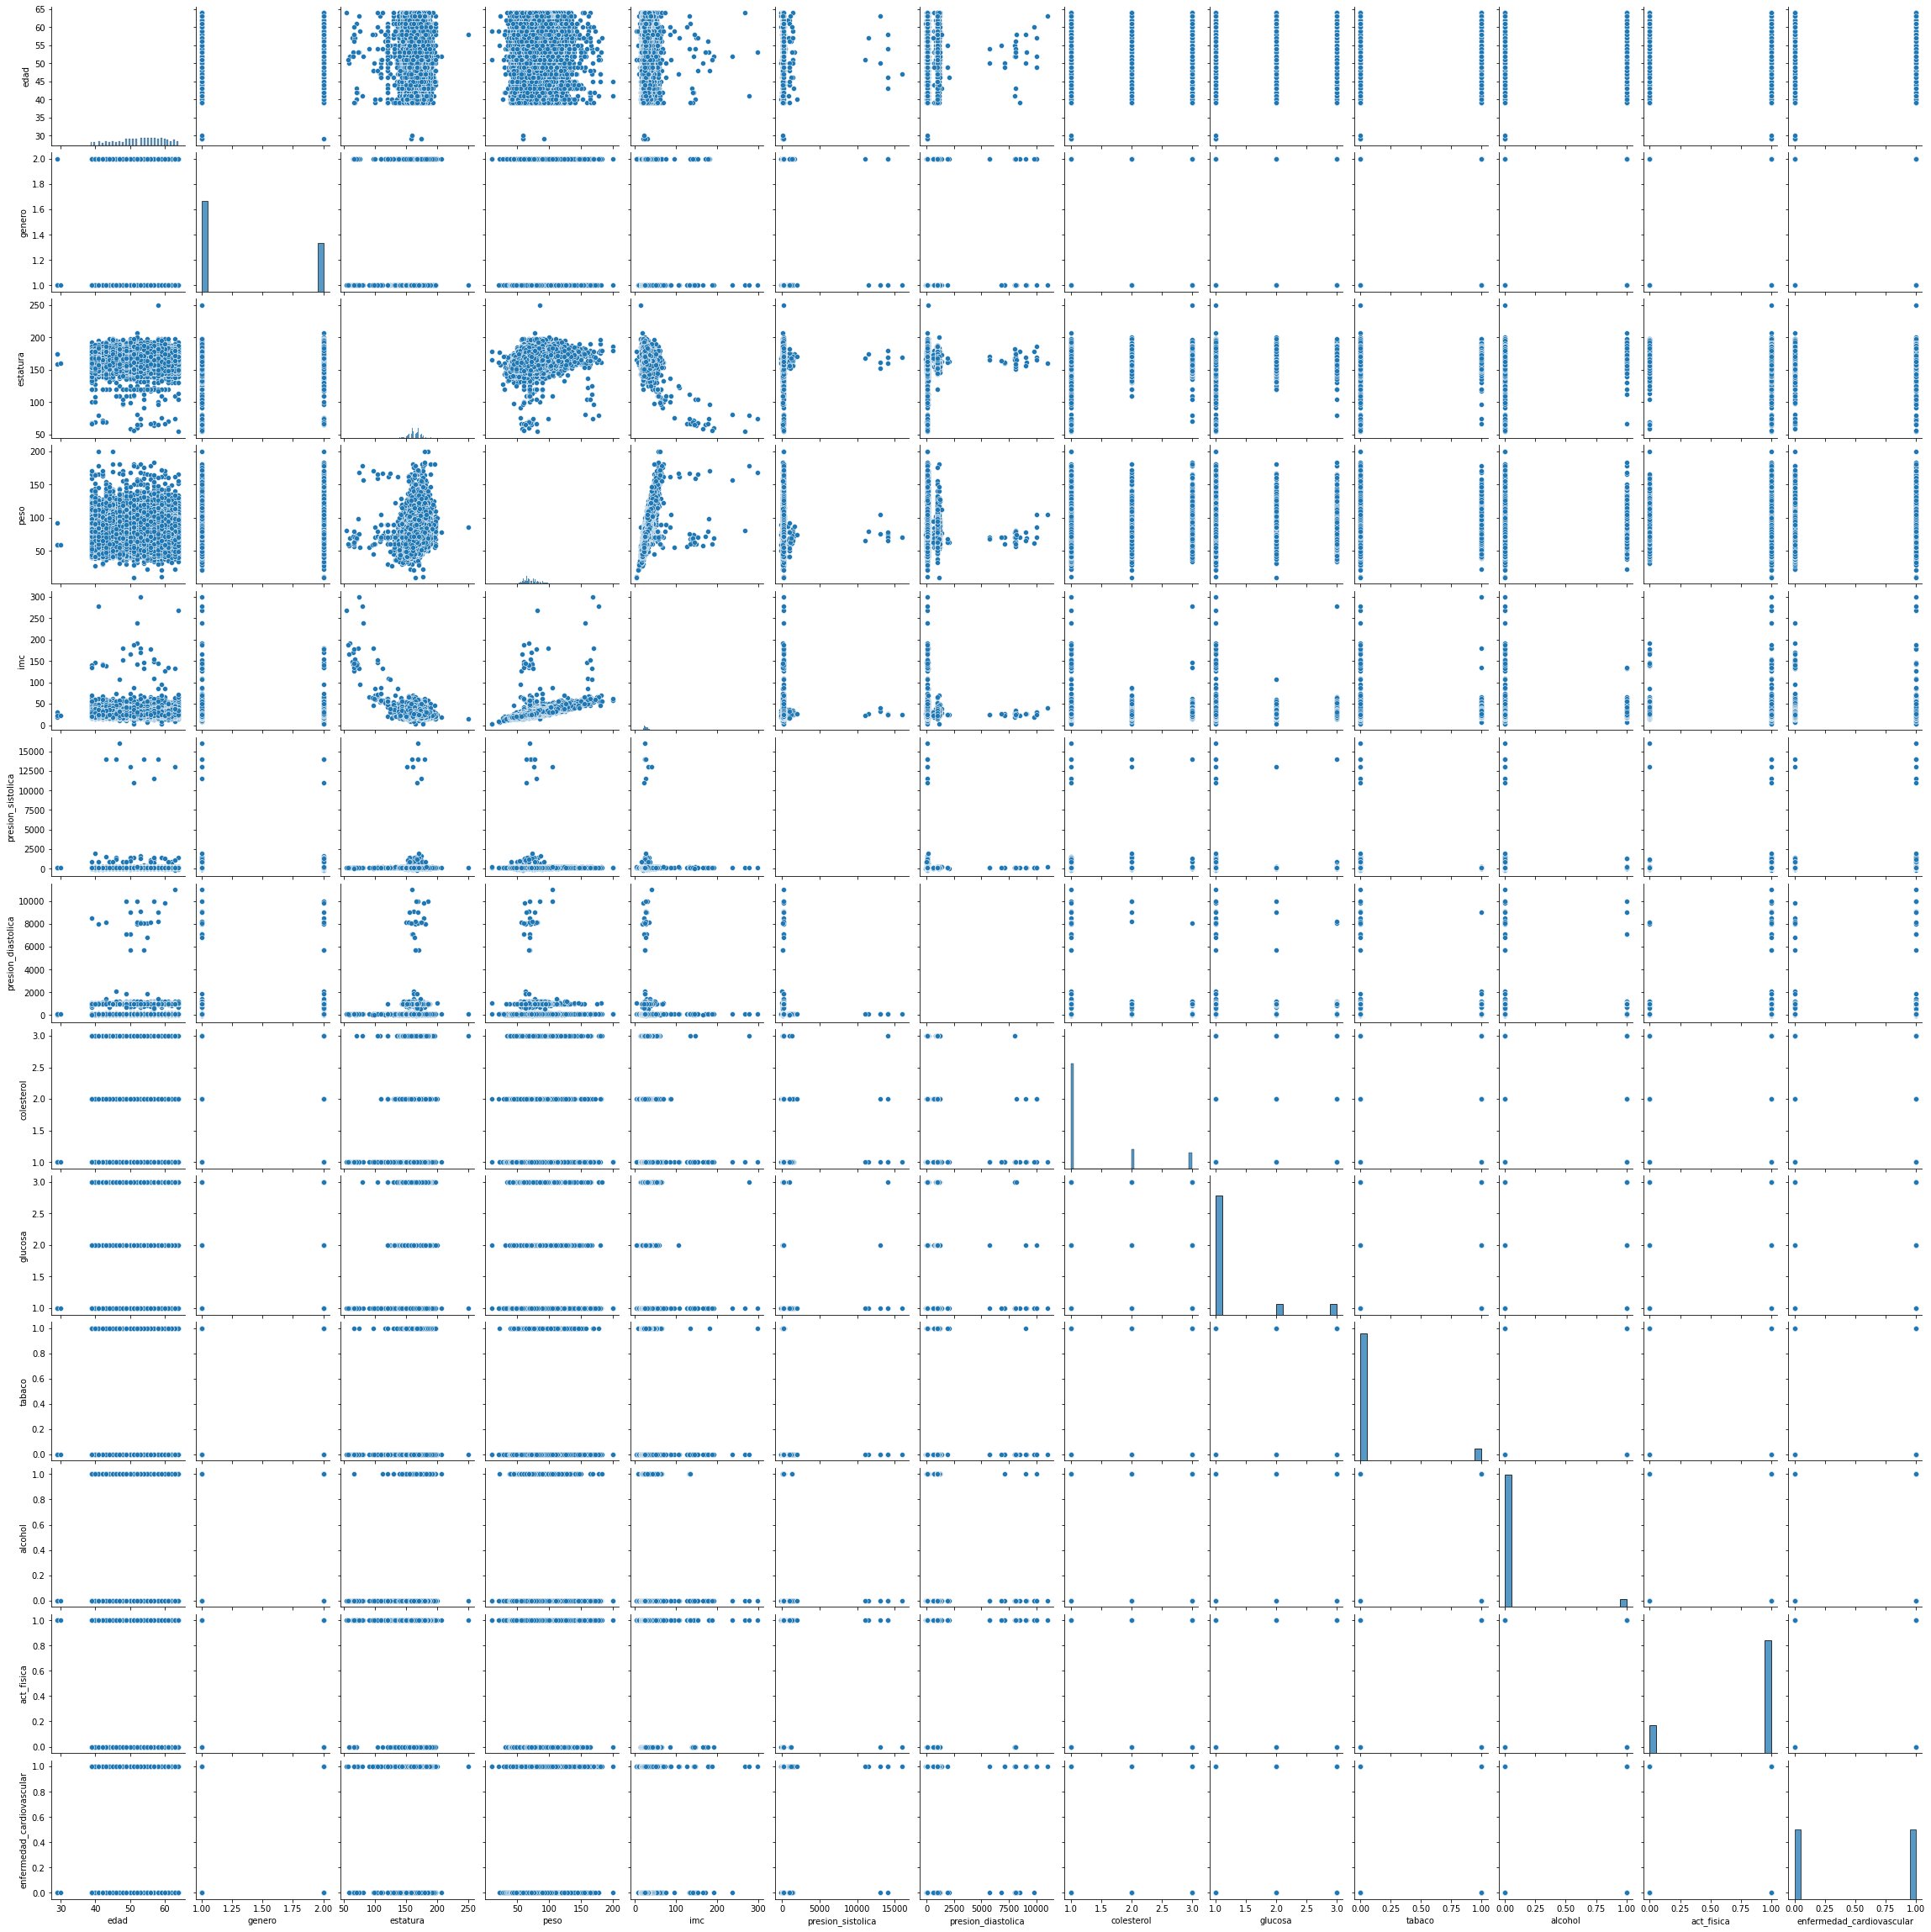

In [34]:
df.corr()
sns.pairplot(df)

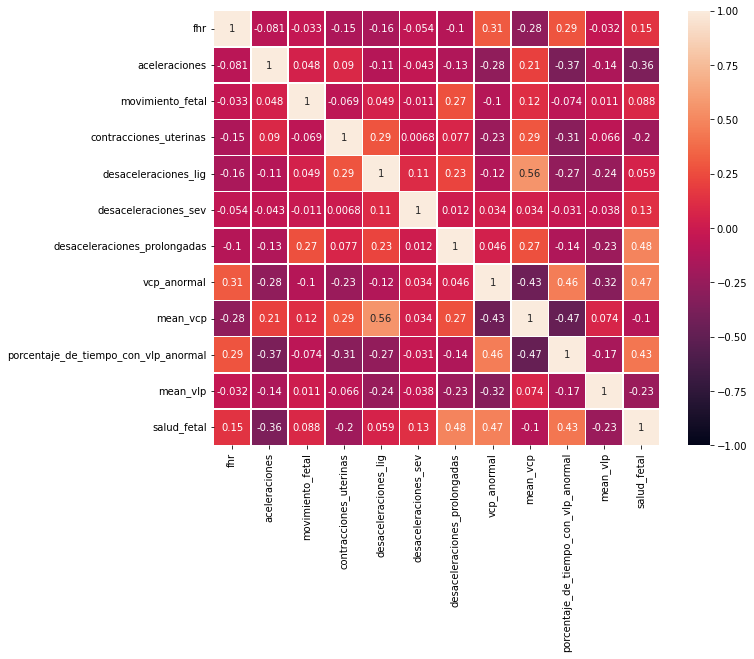

In [31]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5)

In [25]:
heart = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/heart_cleveland_upload.csv')

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


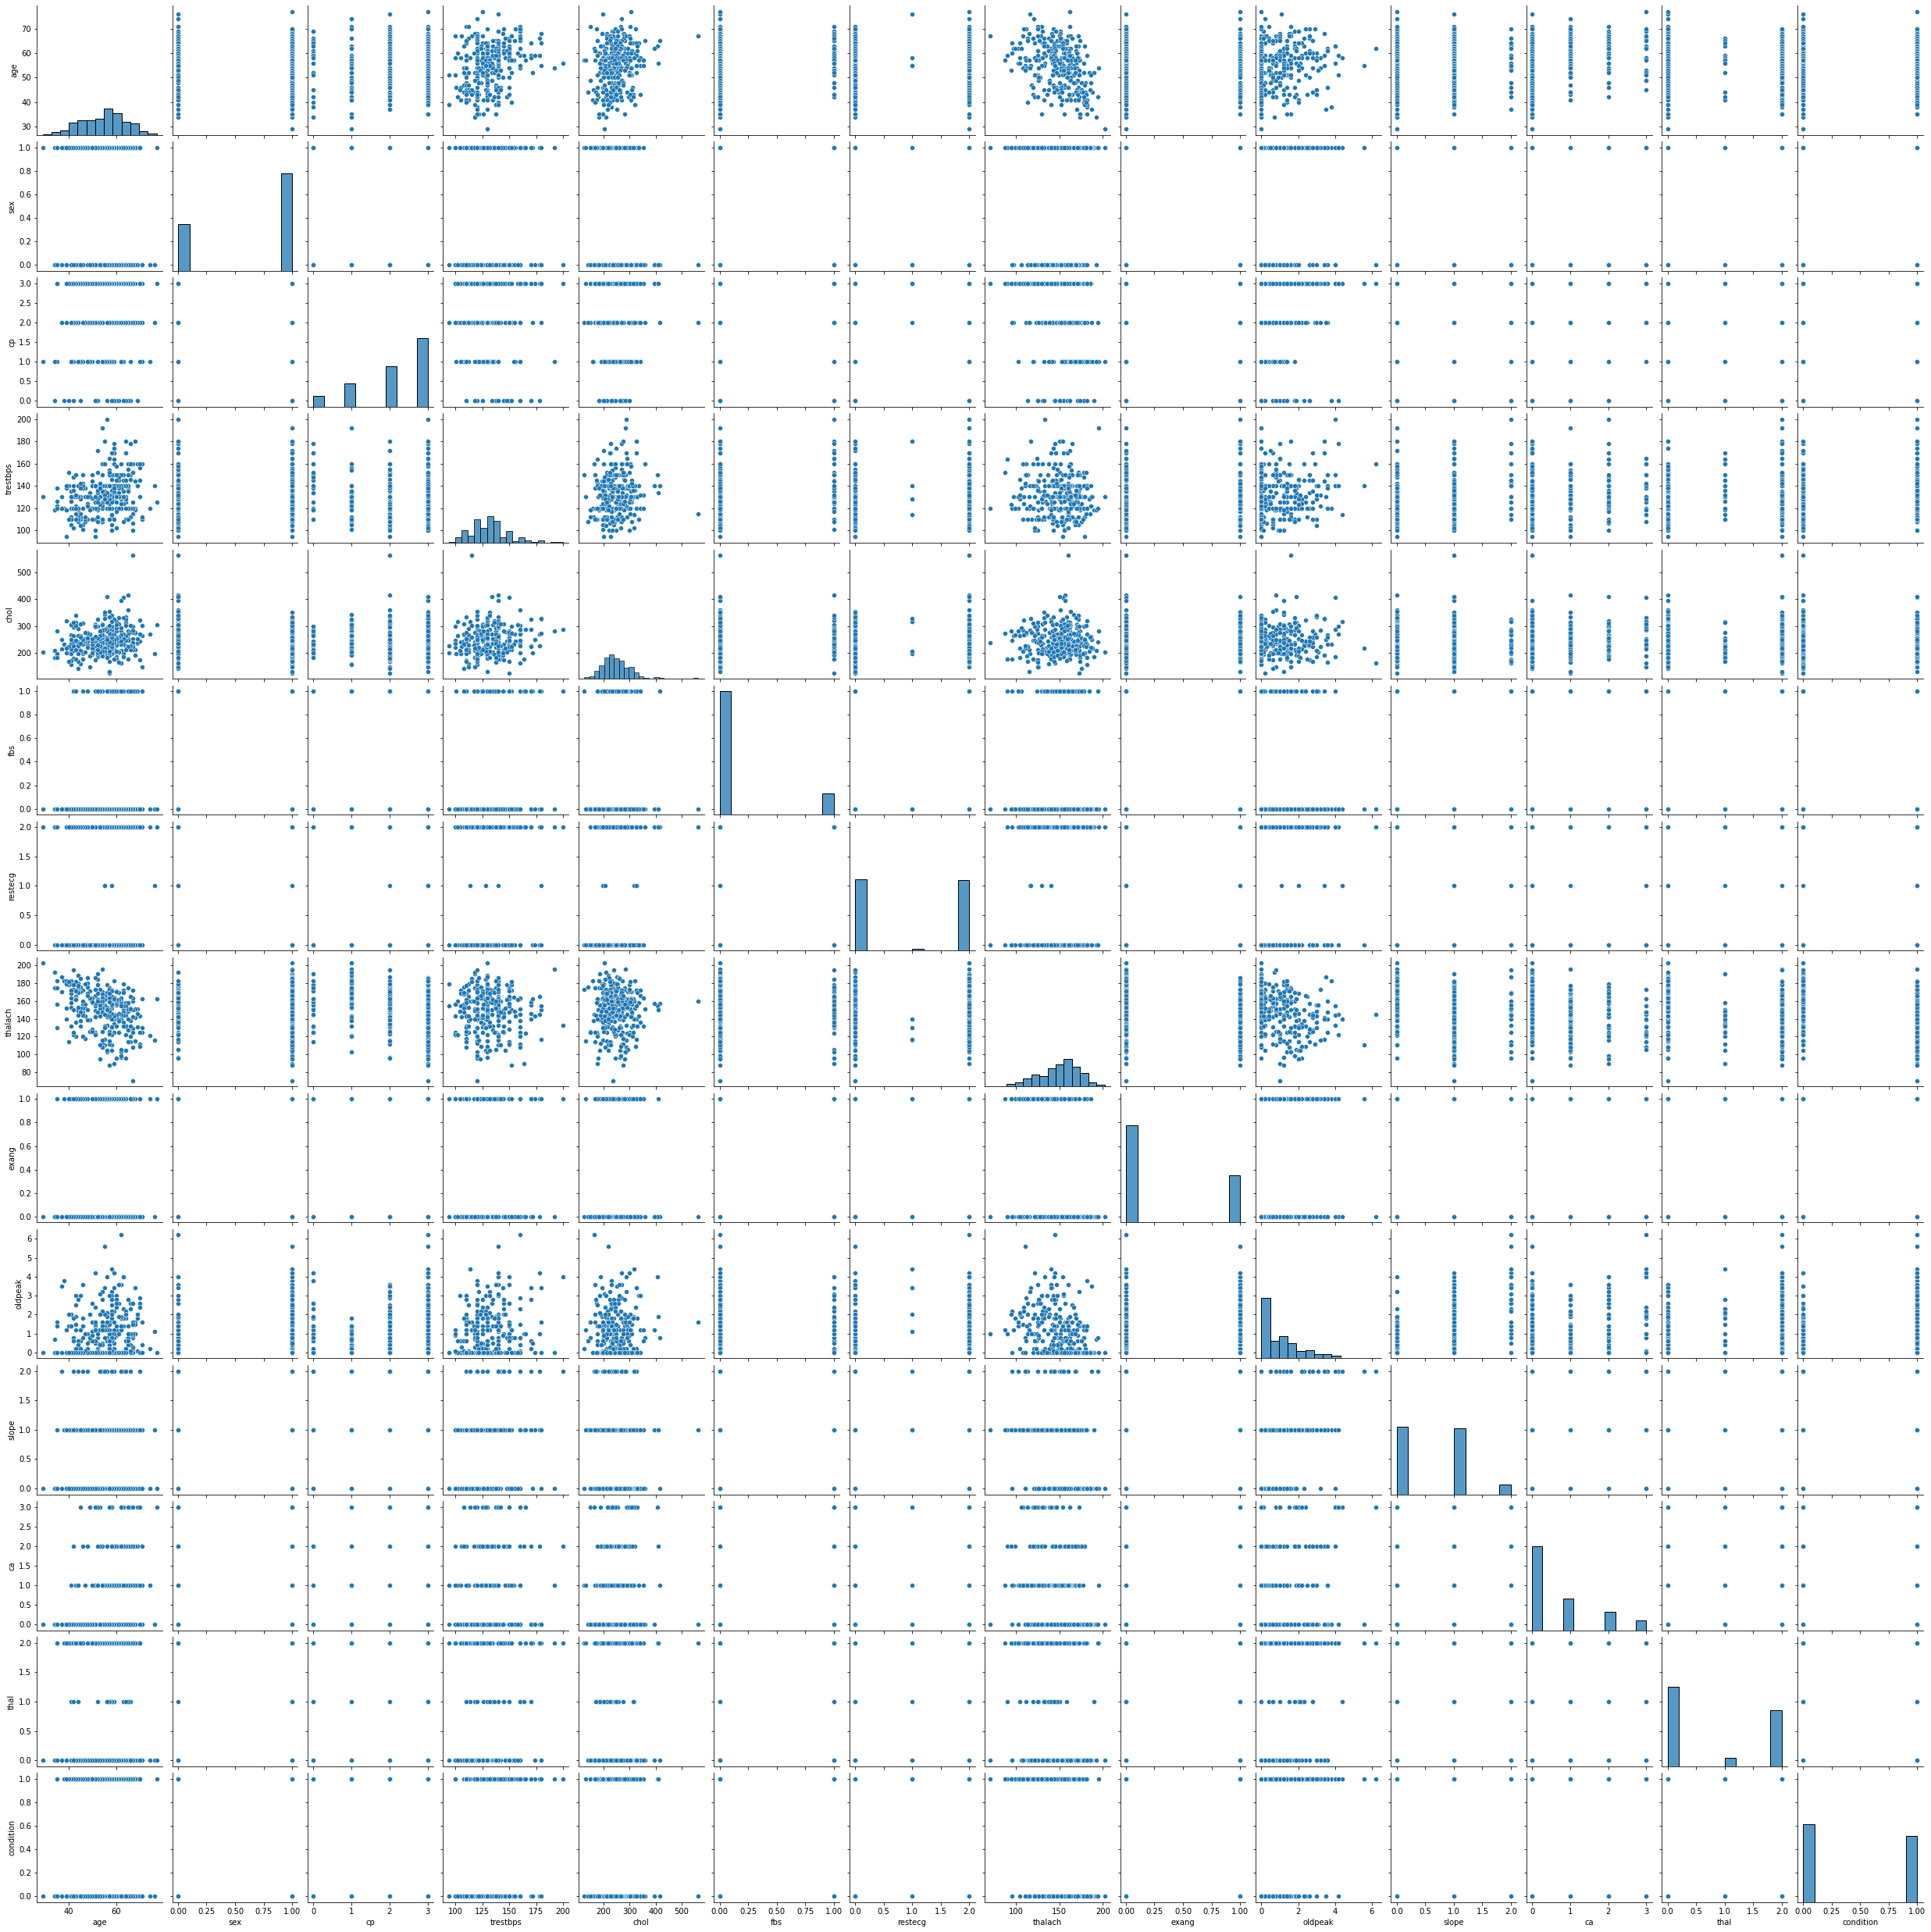

In [26]:
heart.corr()
sns.pairplot(heart)